In [0]:
import os,sys
import cv2
import imutils
import numpy as np
import math
from scipy import ndimage
from matplotlib import pyplot as plt

#**Watermark**

In [0]:
def clean_watermark(img1):
  img = cv2.imread(img1)
  alpha = 2.0
  beta = -160

  new = alpha * img + beta
  new = np.clip(new, 0, 255).astype(np.uint8)

  cv2.imwrite("cleaned.jpg", new)
  plt.imshow(new)
  plt.show()
  print('Please obtain your file as "cleaned.jpg"')

#**Skewed**

In [0]:
def clean_skew(img2):
  img_bef = cv2.imread(img2)
  img_gray = cv2.cvtColor(img_bef, cv2.COLOR_BGR2GRAY)
  img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
  lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

  angles = []

  for x1, y1, x2, y2 in lines[0]:
      cv2.line(img_bef, (x1, y1), (x2, y2), (255, 0, 0), 3)
      angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
      angles.append(angle)

  median_angle = np.median(angles)
  img_rotated = ndimage.rotate(img_bef, median_angle)

  cv2.imwrite('skew_corrected.jpg', img_rotated)
  plt.imshow(img_rotated)
  plt.show()
  print('Please obtain your file as "skew_corrected.jpg"')
  """
  image = cv2.imread(img2)
  gray = cv2.cvtColor(cv2.UMat(image),cv2.COLOR_BGR2GRAY)
  gray = cv2.bitwise_not(gray)
  thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY,cv2.THRESH_OTSU)[1]
  _coordinates = np.column_stack(np.where(thresh>0))
  angle = cv2.minAreaRect(_coordinates)[-1]

  if angle<45:
    angle = -(90+angle)
  else:
    angle = -angle
  (h, w) = image.shape[:2]
  center = (w // 2, h // 2)
  M = cv2.getRotationMatrix2D(center, angle, 1.0)
  rotated = cv2.warpAffine(img2, M, (w, h),
	flags = cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

  cv2.imwrite("skew_corrected.jpg",new)
  """

#**Low-res**

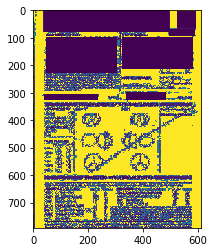

In [0]:
def clean_img(img3):
  img_af = cv2.imread(img3,0)
  equ = cv2.equalizeHist(img_af)
  cv2.imwrite('res_corrected.jpg', equ)
  plt.imshow(equ)
  plt.show()

clean_img('low-res-1.jpg')

Hi! What is the problem with your image?
But please let me know your name first
a
Hi a Please provide the input image name
watermark-1.jpg
Below is the input image


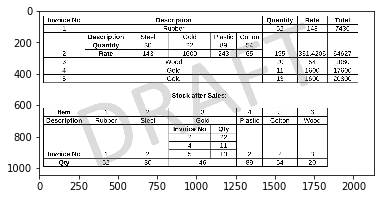

1.Watermark problem
2.Skewed image
3.Low Resolution
1


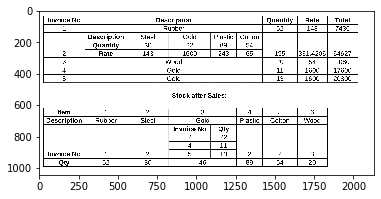

Please obtain your file as "cleaned.jpg"


Was this fine?(Y/N)
Y


In [0]:
from PIL import Image
def main():
  print('Hi! What is the problem with your image?')
  print('But please let me know your name first')
  _name = input()
  print('Hi '+_name+' Please provide the input image name')
  img_name = input()
  img = cv2.imread(img_name)
  print('Below is the input image')
  plt.imshow(img)
  plt.show()
  print('1.Watermark problem\n2.Skewed image\n3.Low Resolution')
  _choice = int(input())
  if _choice==1:
    #print(img_name)
    clean_watermark(img_name)
    print('\n\nWas this fine?(Y/N)')
    if(input() == 'Y'):
      print('\nSee you around!')
      return
    else:
      print('\n')
      main()
  if _choice==2:
    print(img_name)
    clean_skew(img_name)
    print('\n\nWas this fine?(Y/N)')
    if(input() == 'Y' or input() == 'y'):
      print('\nSee you around!')
      return
    else if(input() == 'N' or input() == 'n'):
      print("\n\nIf you're focusing on the pages tilted then it's still \n\t WORK IN PROGRESS! \n\n\t RELEASE COMING THIS WINTER!")
      print('Do you still want to continue?(y/n)')
      if(input()=='y'):
        print('\n')
        main()
      else:
        print('\nSee you around!')
        return
    else:
      print('Please type in from the options given above')

  
if __name__ =='__main__':
  main()
  